# **Boosting**

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

## Load in Data

In [262]:
data = pd.read_csv("data/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Explore Data

There is a relative even balance between the number of poisonous ('p') and edible ('e') mushrooms. Having a balanced class like this ensure we do not need to worry too much about the accuracy paradox. 

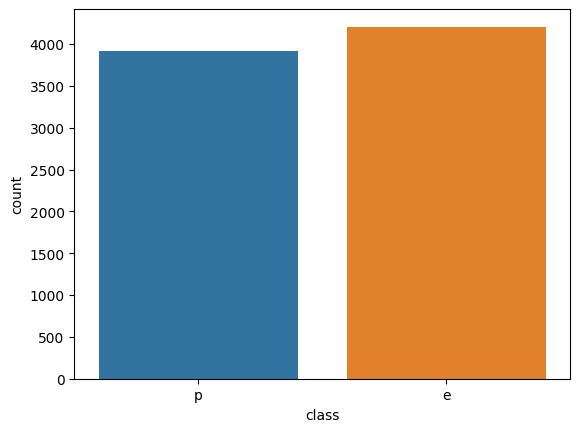

In [263]:
sns.countplot(data, x='class')
plt.show()

Some features have a lot of possible classes, for example there are 12 different possible gill colors. 

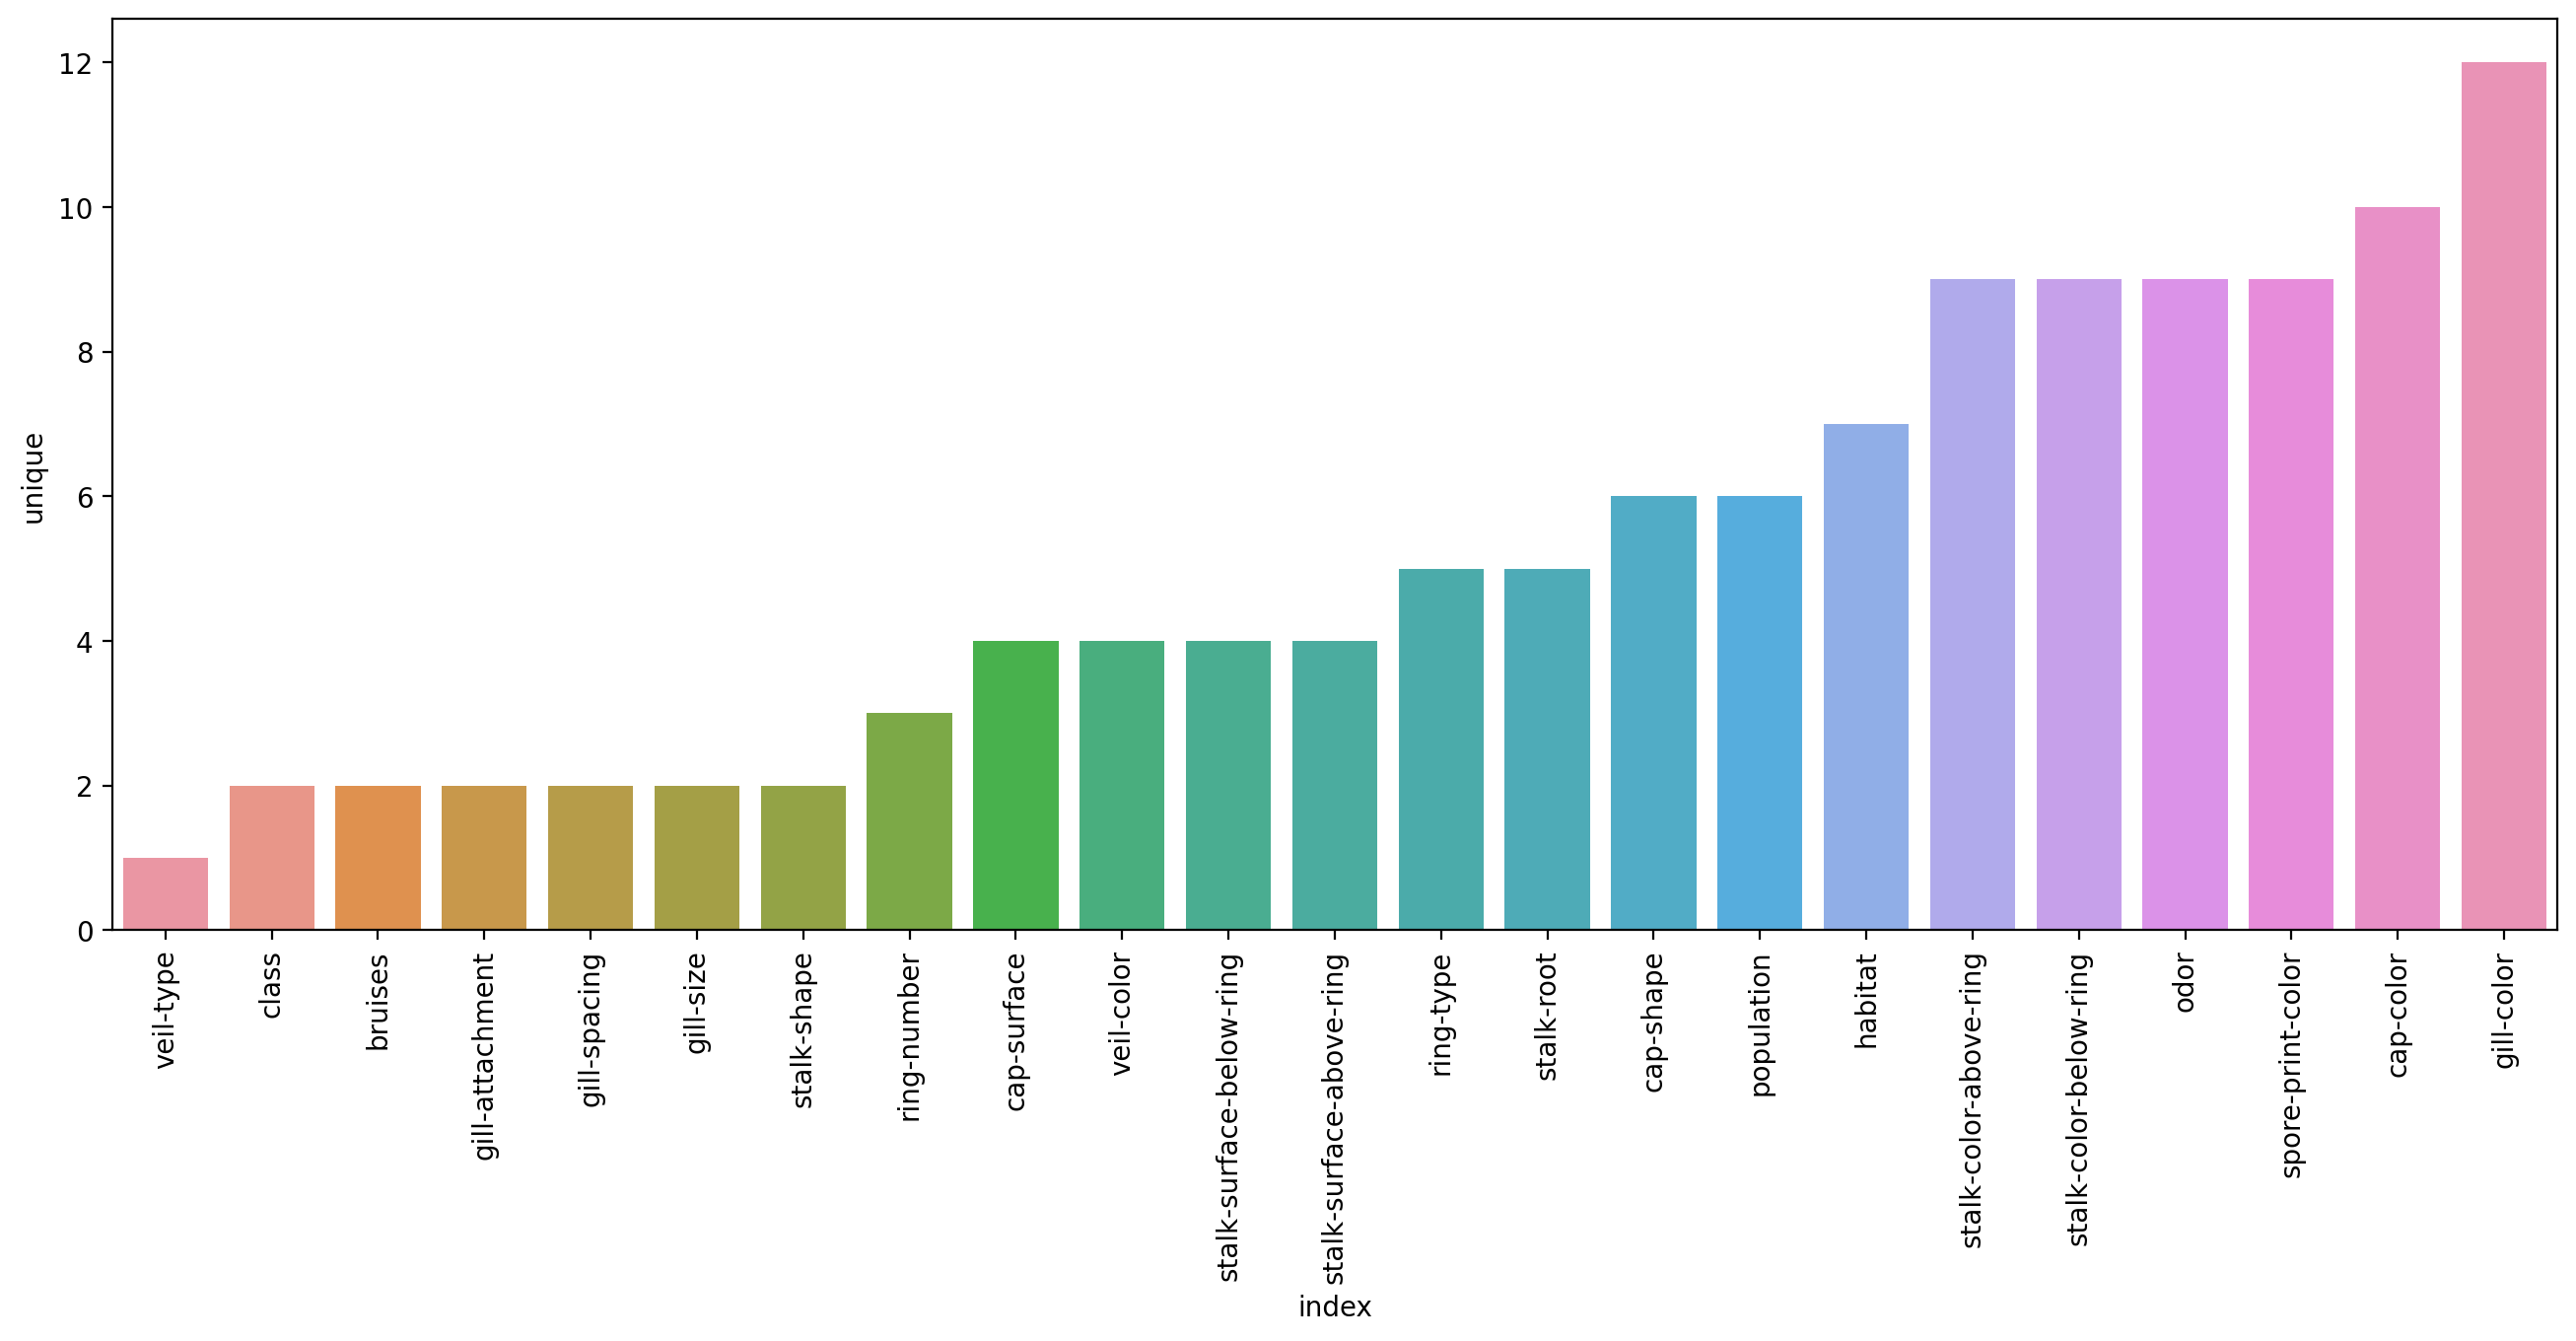

,count,unique,top,freq
gill-color,8124,12,b,1728
cap-color,8124,10,n,2284
spore-print-color,8124,9,w,2388
odor,8124,9,n,3528
stalk-color-below-ring,8124,9,w,4384
stalk-color-above-ring,8124,9,w,4464
habitat,8124,7,d,3148
cap-shape,8124,6,x,3656
population,8124,6,v,4040
ring-type,8124,5,p,3968


In [264]:
plt.figure(figsize=(16,6), dpi=200)
unique_features = data.describe().transpose().reset_index().sort_values(by='unique')
sns.barplot(data=unique_features, x='index', y='unique')
plt.xticks(rotation=90)
plt.show()

data.describe().transpose().sort_values('unique', ascending=False)

## Prepare Data

In [265]:
X = data.drop('class', axis='columns')
y = data['class']
# X.isnull().sum()  # check if there's any NaN values

For classification datasets it helps to create a boolean "dummy"variable for each feature. 

In [266]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [268]:
model = AdaBoostClassifier(n_estimators=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Even with a very simple tree of depth 1, where only one split is considered, the accuracy scores are relatively good. This means we can conclude that simply smelling the mushroom will give you a good indication of whether or not it is poisonous. 

In [269]:
np.sort(model.feature_importances_)[::-1][0:5]

array([1., 0., 0., 0., 0.])

In [270]:
idx_max = model.feature_importances_.argmax()

print(f"Most important feature: {X.columns[idx_max]}")
print()
print(classification_report(y_test, y_pred))

Most important feature: odor_n

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



From the data it can be seen that if the odor of a mushroom is "none" ('n'), then there is a good chance it will be edible ('e')

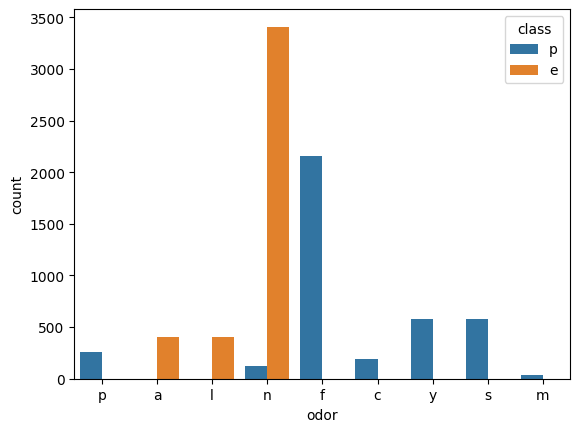

In [271]:
sns.countplot(data, x='odor', hue='class')
plt.show()

Using a single estimator (single tree) already gives pretty good results, using more estimators will ofcourse give even better results. Technically speaking the most accurate predictions will follow from a model with an estimator for each column in the dataset (including dummie variables). This would however be computationally expensive, so we can gradually increase the number of estimators and see which value of $n$ will give an acceptable level of accuracy. 

In [272]:
error_rates = []
N = len(X.columns) + 1
n_values = range(1, N)
feature_importance_data = {col: [] for col in X.columns}
most_important_data = {col: [] for col in X.columns}


for n in n_values:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)

    for col, fi in zip(X.columns, model.feature_importances_):
        feature_importance_data[col].append(fi)
    
    y_pred = model.predict(X_test)
    e = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(e)

By plotting the number of estimators against the error rate, it can be seen that at $n$ = 20 estimators (trees) there is no real increase in accuracy. 

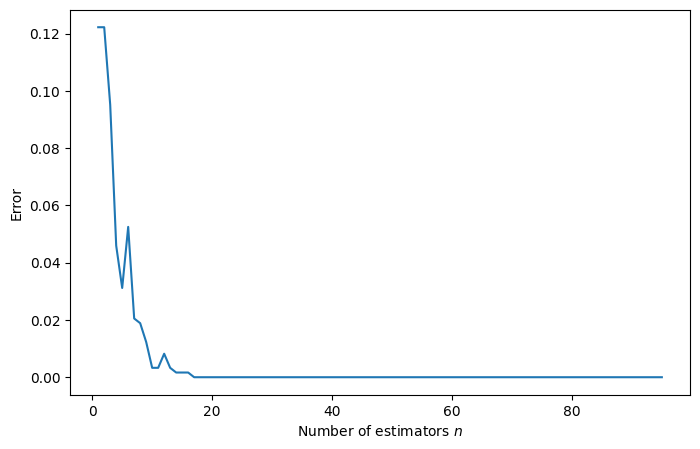

In [273]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(n_values, error_rates)
plt.xlabel('Number of estimators $n$')
plt.ylabel('Error')
plt.show()

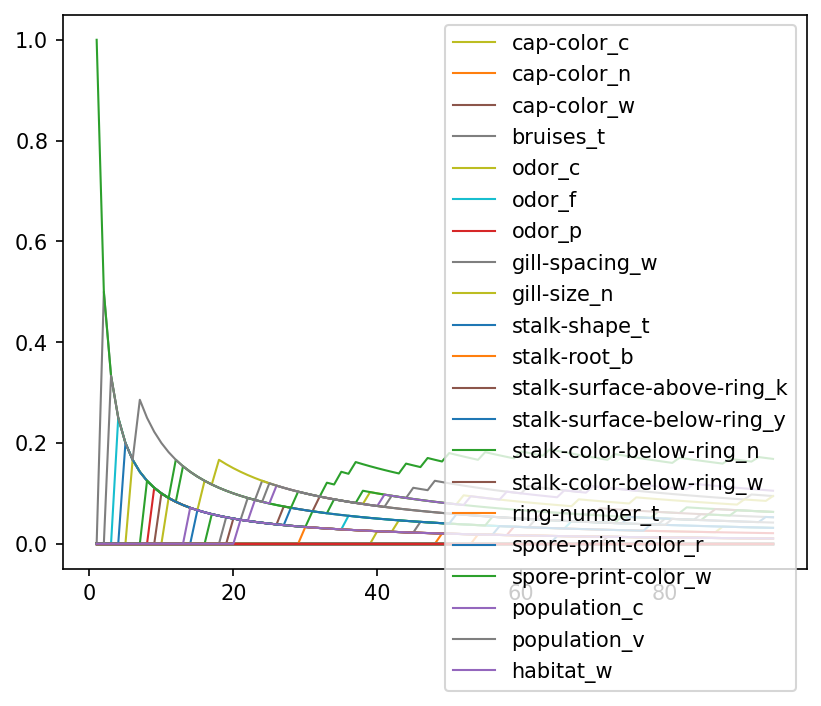

In [274]:
plt.figure(dpi=150)

for feature, importance in feature_importance_data.items():
    # plt.plot(n_values, importance, 'o', ms=2)
    if np.argmax(importance) > 0.1:
        plt.plot(n_values, importance, '-', lw=1, label=feature)
    else:
        plt.plot(n_values, importance, '-', lw=1)
    
plt.legend()
    

In [275]:
features = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])
important_features = features[features['Importance']>0].sort_values('Importance')
important_features

,Importance
cap-color_c,0.010526
ring-number_t,0.010526
stalk-color-below-ring_w,0.010526
stalk-root_b,0.010526
stalk-shape_t,0.010526
habitat_w,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
odor_p,0.021053
odor_c,0.031579


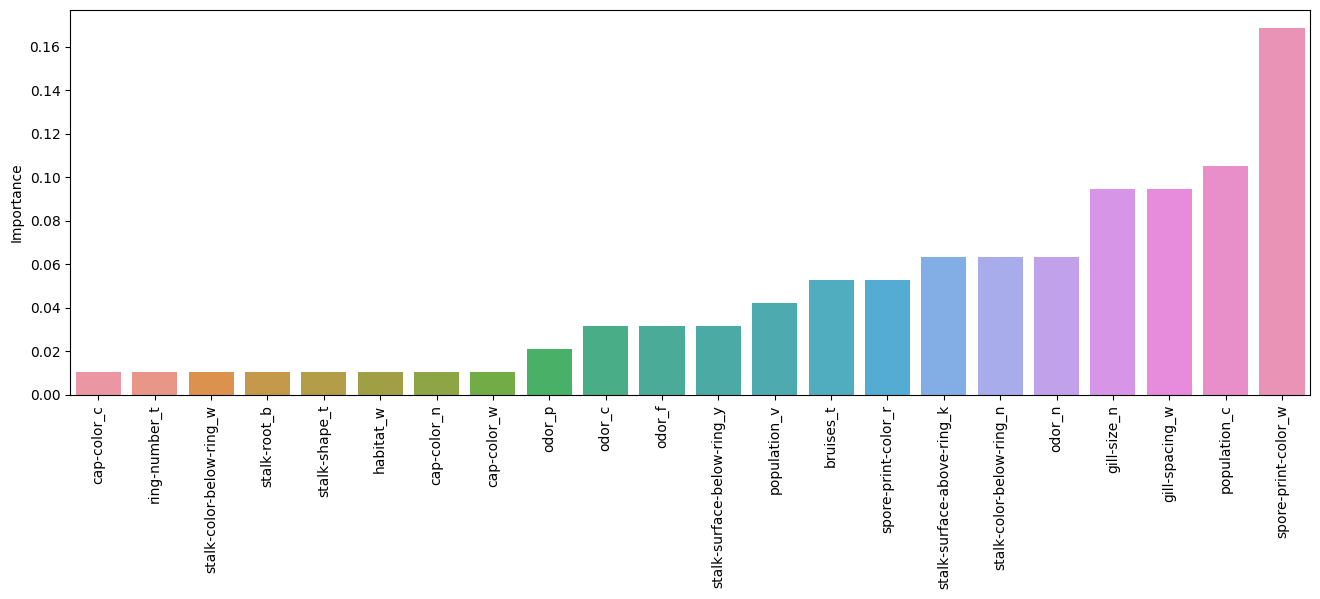

In [276]:
plt.figure(figsize=(16, 5), dpi=100)
sns.barplot(data=important_features, x=important_features.index, y='Importance')
plt.xticks(rotation=90)
plt.show()

In [277]:
# TODO: store feature importance for every value of n and make a scatter plot / line graph showing all the features and how their importance changes based on the number of estimators

## Gradient Boosting

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)


In [279]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3,4,5],
}

In [280]:
model = GradientBoostingClassifier()

In [281]:
grid = GridSearchCV(model, param_grid)

In [282]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [283]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

In [284]:
y_pred = grid.predict(X_test)

In [285]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [286]:
feature_importances = grid.best_estimator_.feature_importances_
important_features = pd.DataFrame(
    index = X.columns, 
    data = feature_importances,
    columns=['Importance']
)

important_features = important_features.sort_values(by='Importance')
important_features = important_features[important_features['Importance']>0.0005]
important_features

,Importance
cap-shape_c,0.000632
stalk-surface-above-ring_k,0.000649
stalk-surface-below-ring_s,0.000718
stalk-surface-above-ring_s,0.000795
stalk-color-below-ring_w,0.000880
ring-type_p,0.000907
ring-number_o,0.000923
ring-number_t,0.000955
stalk-root_b,0.000972
ring-type_n,0.000974


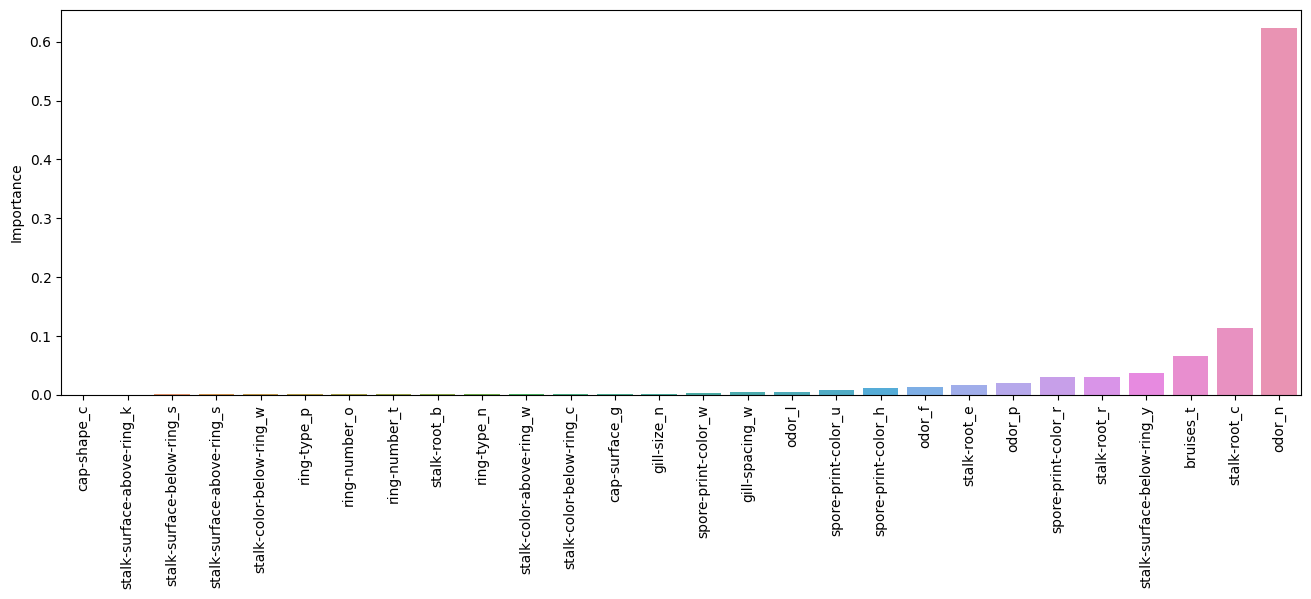

In [287]:
plt.figure(figsize=(16, 5), dpi=100)
sns.barplot(data=important_features, x=important_features.index, y='Importance')
plt.xticks(rotation=90)
plt.show()